In [53]:
#carrega biblioteca 
#!pip install nltk
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import numpy as np
import pandas as pd
from os import path
from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\valer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
#carregar arquivo 
f = open('o_alienista.txt',encoding='utf-8')
texto =" "
while 1:
    line = f.readline()
    if not line:break
    texto += line
f.close()

print(texto)
print(type(texto))



 As crônicas da vila de Itaguaí dizem que em tempos remotos vivera ali um certo médico, o Dr. Simão Bacamarte, filho da nobreza da terra e o maior dos médicos do Brasil, de Portugal e das Espanhas. Estudara em Coimbra e Pádua. Aos trinta e quatro anos regressou ao Brasil, não podendo el-rei alcançar dele que ficasse em Coimbra, regendo a universidade, ou em Lisboa, expedindo os negócios da monarquia.
- A ciência, disse ele a Sua Majestade, é o meu emprego único; Itaguaí é o meu universo.
Dito isso, meteu-se em Itaguaí, e entregou-se de corpo e alma ao estudo da ciência, alternando as curas com as leituras, e demonstrando os teoremas com cataplasmas. Aos quarenta anos casou com D. Evarista da Costa e Mascarenhas, senhora de vinte e cinco anos, viúva de um juiz de fora, e não bonita nem simpática. Um dos tios dele, caçador de pacas perante o Eterno, e não menos franco, admirou-se de semelhante escolha e disse-lho. Simão Bacamarte explicou-lhe que D. Evarista reunia condições fisiológicas

In [63]:
#quebrando o texto em palavras
tokenized_word=word_tokenize(texto)
print(tokenized_word)

['As', 'crônicas', 'da', 'vila', 'de', 'Itaguaí', 'dizem', 'que', 'em', 'tempos', 'remotos', 'vivera', 'ali', 'um', 'certo', 'médico', ',', 'o', 'Dr.', 'Simão', 'Bacamarte', ',', 'filho', 'da', 'nobreza', 'da', 'terra', 'e', 'o', 'maior', 'dos', 'médicos', 'do', 'Brasil', ',', 'de', 'Portugal', 'e', 'das', 'Espanhas', '.', 'Estudara', 'em', 'Coimbra', 'e', 'Pádua', '.', 'Aos', 'trinta', 'e', 'quatro', 'anos', 'regressou', 'ao', 'Brasil', ',', 'não', 'podendo', 'el-rei', 'alcançar', 'dele', 'que', 'ficasse', 'em', 'Coimbra', ',', 'regendo', 'a', 'universidade', ',', 'ou', 'em', 'Lisboa', ',', 'expedindo', 'os', 'negócios', 'da', 'monarquia', '.', '-', 'A', 'ciência', ',', 'disse', 'ele', 'a', 'Sua', 'Majestade', ',', 'é', 'o', 'meu', 'emprego', 'único', ';', 'Itaguaí', 'é', 'o', 'meu', 'universo', '.', 'Dito', 'isso', ',', 'meteu-se', 'em', 'Itaguaí', ',', 'e', 'entregou-se', 'de', 'corpo', 'e', 'alma', 'ao', 'estudo', 'da', 'ciência', ',', 'alternando', 'as', 'curas', 'com', 'as', 'lei

In [64]:
#palavras em letras minusculas
tokenized_word_2=[w.lower() for w in tokenized_word]
print(tokenized_word_2)

['as', 'crônicas', 'da', 'vila', 'de', 'itaguaí', 'dizem', 'que', 'em', 'tempos', 'remotos', 'vivera', 'ali', 'um', 'certo', 'médico', ',', 'o', 'dr.', 'simão', 'bacamarte', ',', 'filho', 'da', 'nobreza', 'da', 'terra', 'e', 'o', 'maior', 'dos', 'médicos', 'do', 'brasil', ',', 'de', 'portugal', 'e', 'das', 'espanhas', '.', 'estudara', 'em', 'coimbra', 'e', 'pádua', '.', 'aos', 'trinta', 'e', 'quatro', 'anos', 'regressou', 'ao', 'brasil', ',', 'não', 'podendo', 'el-rei', 'alcançar', 'dele', 'que', 'ficasse', 'em', 'coimbra', ',', 'regendo', 'a', 'universidade', ',', 'ou', 'em', 'lisboa', ',', 'expedindo', 'os', 'negócios', 'da', 'monarquia', '.', '-', 'a', 'ciência', ',', 'disse', 'ele', 'a', 'sua', 'majestade', ',', 'é', 'o', 'meu', 'emprego', 'único', ';', 'itaguaí', 'é', 'o', 'meu', 'universo', '.', 'dito', 'isso', ',', 'meteu-se', 'em', 'itaguaí', ',', 'e', 'entregou-se', 'de', 'corpo', 'e', 'alma', 'ao', 'estudo', 'da', 'ciência', ',', 'alternando', 'as', 'curas', 'com', 'as', 'lei

In [65]:
#retirando stopwords - primeiro, verificar quais existem ==> !!! verbos são considerados stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("portuguese"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\valer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'tivessem', 'estejam', 'sejam', 'estão', 'seja', 'está', 'de', 'esta', 'houveríamos', 'houver', 'éramos', 'tivéssemos', 'seria', 'nossos', 'sem', 'estamos', 'estavam', 'na', 'tiver', 'qual', 'houverem', 'será', 'hão', 'fui', 'esses', 'serão', 'com', 'pelos', 'terá', 'estávamos', 'tínhamos', 'tuas', 'nós', 'houve', 'houvesse', 'houverei', 'fossem', 'houvemos', 'haja', 'suas', 'tivemos', 'me', 'tinham', 'houveria', 'aos', 'tu', 'no', 'houvéssemos', 'nosso', 'houverá', 'eram', 'nossa', 'das', 'ele', 'lhe', 'lhes', 'são', 'foi', 'sou', 'teus', 'seremos', 'tenhamos', 'tive', 'ao', 'nas', 'nem', 'estiverem', 'estiveram', 'isso', 'essa', 'havemos', 'esse', 'se', 'às', 'quem', 'sejamos', 'já', 'seus', 'seríamos', 'você', 'estes', 'estivemos', 'estas', 'aquelas', 'houvéramos', 'era', 'tivesse', 'quando', 'como', 'meu', 'estava', 'esteja

In [75]:
#adicionamento stopwords extras
stop_words.update(('%','.',',',':','?','!',';','-','...',':','' '','``',"''"))

print(stop_words)

{'', 'tivessem', 'estejam', 'sejam', 'estão', 'seja', 'está', 'de', 'esta', 'houveríamos', 'houver', 'éramos', 'tivéssemos', 'seria', 'nossos', 'sem', 'estamos', 'estavam', 'na', 'tiver', 'qual', 'houverem', 'será', 'hão', 'fui', 'esses', 'serão', ';', 'com', '-', "''", 'pelos', 'terá', 'estávamos', '...', 'tínhamos', 'tuas', 'nós', 'houve', 'houvesse', 'houverei', 'fossem', 'houvemos', 'haja', '?', 'suas', 'tivemos', 'me', 'tinham', 'houveria', 'aos', 'tu', 'no', 'houvéssemos', 'nosso', 'houverá', '!', 'eram', 'nossa', 'das', 'ele', 'lhe', 'lhes', 'são', 'foi', ',', 'sou', 'teus', 'seremos', 'tenhamos', '``', 'tive', 'ao', 'nas', 'nem', 'estiverem', 'estiveram', 'isso', 'essa', 'havemos', 'esse', 'se', 'às', 'quem', 'sejamos', 'já', 'seus', 'seríamos', 'você', 'estes', 'estivemos', 'estas', 'aquelas', 'houvéramos', 'era', 'tivesse', 'quando', 'como', 'meu', 'estava', 'estejamos', 'isto', 'há', 'tivéramos', 'mesmo', 'até', 'só', 'eles', 'deles', 'a', 'muito', 'hajam', 'terão', 'estiver

In [76]:
#removendo as stopswords do texto

tokenized_word_3=[]
for w in tokenized_word_2:
    if w not in stop_words:
        tokenized_word_3.append(w)

In [77]:
#comparando data set antes e dp da remoção de stopwords

print(tokenized_word)
print(tokenized_word_3)

['As', 'crônicas', 'da', 'vila', 'de', 'Itaguaí', 'dizem', 'que', 'em', 'tempos', 'remotos', 'vivera', 'ali', 'um', 'certo', 'médico', ',', 'o', 'Dr.', 'Simão', 'Bacamarte', ',', 'filho', 'da', 'nobreza', 'da', 'terra', 'e', 'o', 'maior', 'dos', 'médicos', 'do', 'Brasil', ',', 'de', 'Portugal', 'e', 'das', 'Espanhas', '.', 'Estudara', 'em', 'Coimbra', 'e', 'Pádua', '.', 'Aos', 'trinta', 'e', 'quatro', 'anos', 'regressou', 'ao', 'Brasil', ',', 'não', 'podendo', 'el-rei', 'alcançar', 'dele', 'que', 'ficasse', 'em', 'Coimbra', ',', 'regendo', 'a', 'universidade', ',', 'ou', 'em', 'Lisboa', ',', 'expedindo', 'os', 'negócios', 'da', 'monarquia', '.', '-', 'A', 'ciência', ',', 'disse', 'ele', 'a', 'Sua', 'Majestade', ',', 'é', 'o', 'meu', 'emprego', 'único', ';', 'Itaguaí', 'é', 'o', 'meu', 'universo', '.', 'Dito', 'isso', ',', 'meteu-se', 'em', 'Itaguaí', ',', 'e', 'entregou-se', 'de', 'corpo', 'e', 'alma', 'ao', 'estudo', 'da', 'ciência', ',', 'alternando', 'as', 'curas', 'com', 'as', 'lei

In [78]:
#Analisando a distribuição das plavras
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word_3)
fdist.most_common(20)

[('casa', 108),
 ('alienista', 106),
 ('verde', 77),
 ('bacamarte', 60),
 ('barbeiro', 54),
 ('câmara', 52),
 ('itaguaí', 49),
 ('simão', 49),
 ('evarista', 45),
 ('d.', 44),
 ('todos', 37),
 ('outra', 37),
 ('outro', 34),
 ('boticário', 32),
 ('nada', 32),
 ('tão', 31),
 ('governo', 31),
 ('disse', 30),
 ('homem', 30),
 ('ainda', 29)]

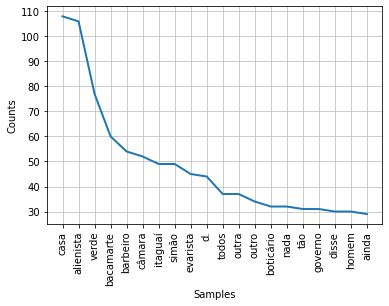

In [79]:
#incluindo em gráfico a distruição das palavras
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

In [84]:
#criando uma wordcloud

wc = WordCloud()
img = wc.generate_from_text(' '.join(tokenized_word_3))
img.to_file('worcloud.jpeg')